#Reto Empresarial - Ejercicio MLP - Daniel Afanador

In [1]:
#--- Importamos paquetes escenciales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#--- Cargamos el paquete torch y otras utilidades
import torch
from torch.autograd import Variable # Para convertir nuestras variables a tensores
import torch.utils.data as Data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

mlp = pd.read_csv('MLP_regresion.csv')

#-- Extraemos la infromación más importante
x = np.array(mlp['X'])
y = np.array(mlp['Y'])

np.shape(x), np.shape(y)

((1000,), (1000,))

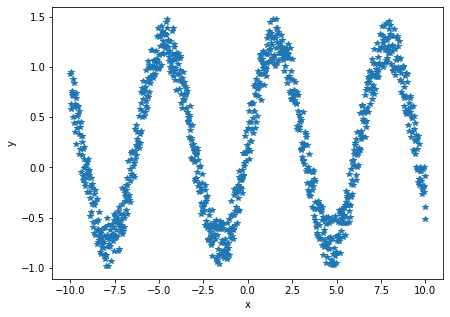

In [3]:
#--- Visualizamos los datos

fig = plt.figure(figsize=(7,5))
plt.plot(x,y,'*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
#--- Convertimos los numpy a tensores

X = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(X,dim=1)


Y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(Y,dim=1)

In [5]:
#--- Definimos la ANN para el primer modelo
input_dim = 1
model1 = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 1024),
                torch.nn.ReLU(),
                torch.nn.Linear(1024, 1024),
                torch.nn.ReLU(),
                torch.nn.Linear(1024, input_dim),
                )
model1

Sequential(
  (0): Linear(in_features=1, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1024, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1024, out_features=1, bias=True)
)

In [6]:
#-- Definimos el opmimizador y el score de evaluación
optimizer = torch.optim.SGD(model1.parameters(), lr=1e-2)
criterion = torch.nn.MSELoss()  # Para una regresión es mejor usar MSE

Epoch: [1/1], loss: 0.7077538371086121


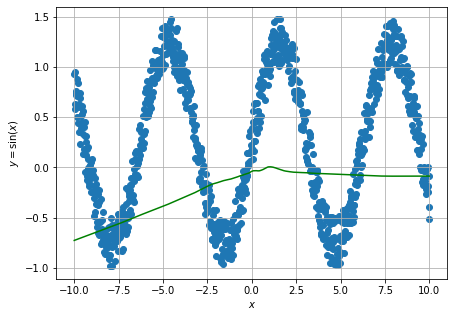

Epoch: [1/101], loss: 0.4024259150028229


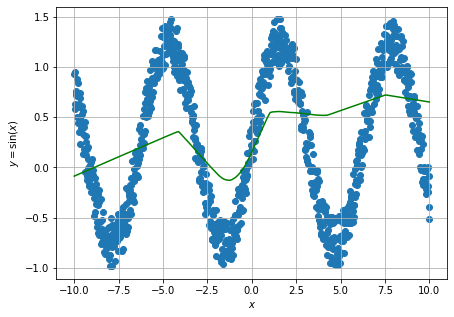

Epoch: [1/201], loss: 0.33910372853279114


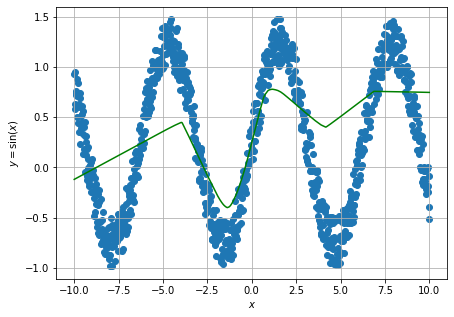

Epoch: [1/301], loss: 0.27464228868484497


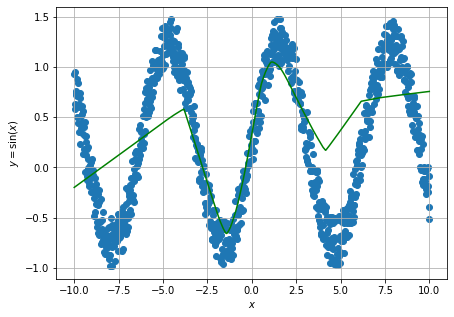

Epoch: [1/401], loss: 0.24370065331459045


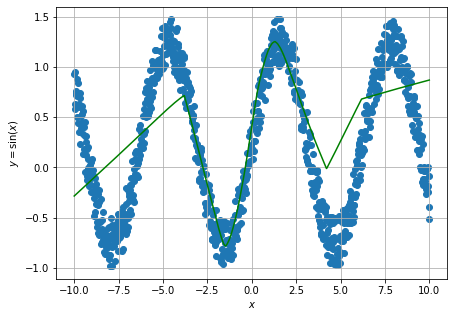

Epoch: [1/501], loss: 0.22053414583206177


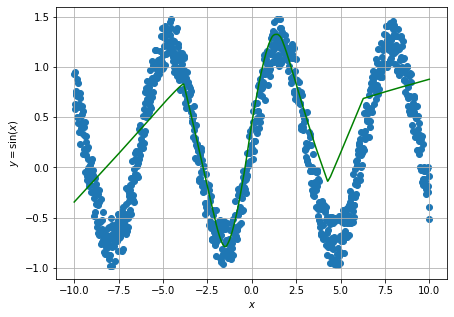

Epoch: [1/601], loss: 0.20543113350868225


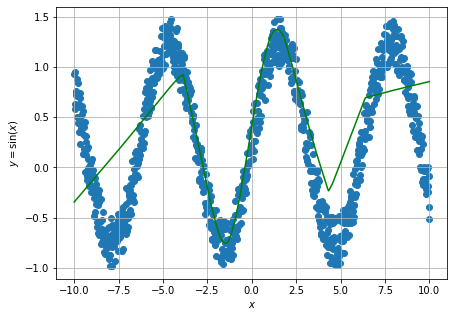

Epoch: [1/701], loss: 0.19362139701843262


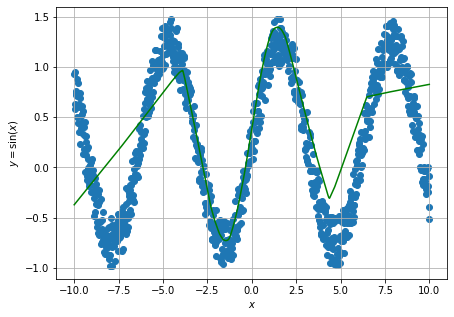

Epoch: [1/801], loss: 0.1852463036775589


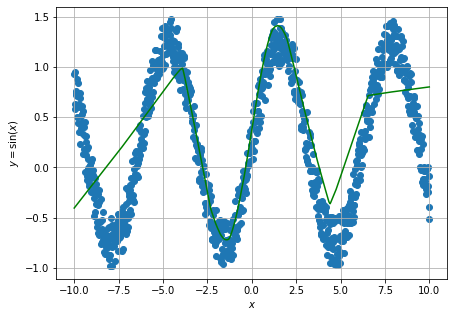

Epoch: [1/901], loss: 0.17900022864341736


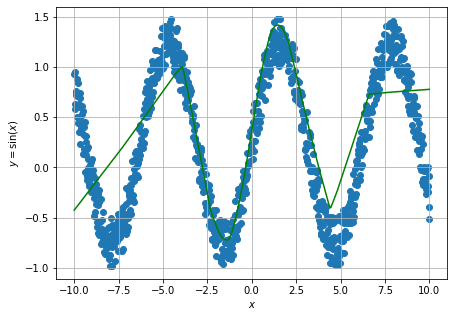

Epoch: [1/1001], loss: 0.17605555057525635


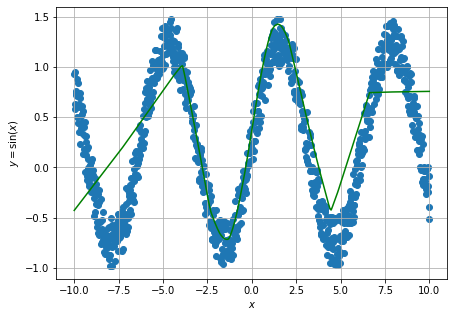

Epoch: [1/1101], loss: 0.17222380638122559


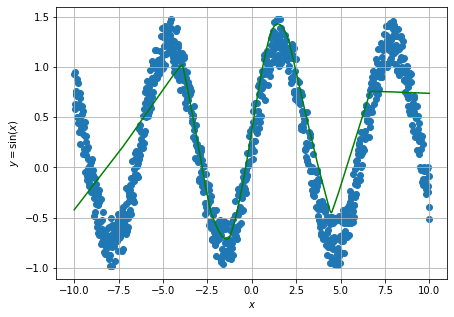

Epoch: [1/1201], loss: 0.16921193897724152


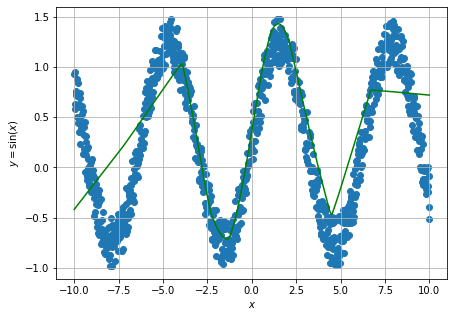

Epoch: [1/1301], loss: 0.16664573550224304


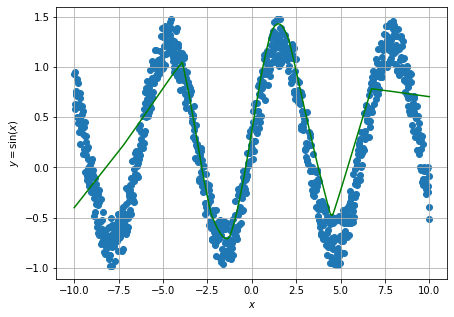

Epoch: [1/1401], loss: 0.1642460972070694


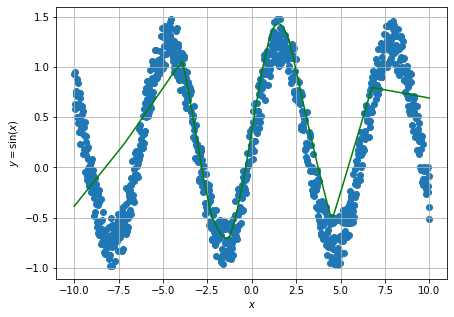

Epoch: [1/1501], loss: 0.16261830925941467


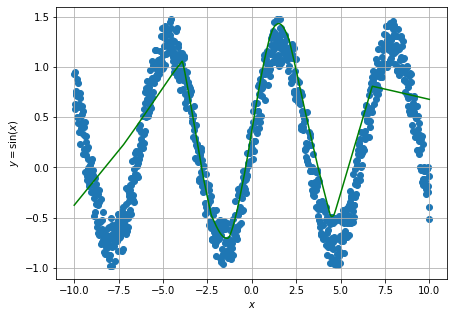

Epoch: [1/1601], loss: 0.16153161227703094


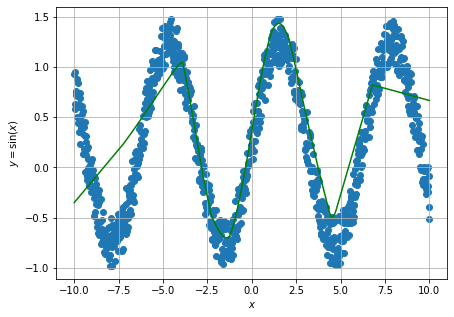

Epoch: [1/1701], loss: 0.15637850761413574


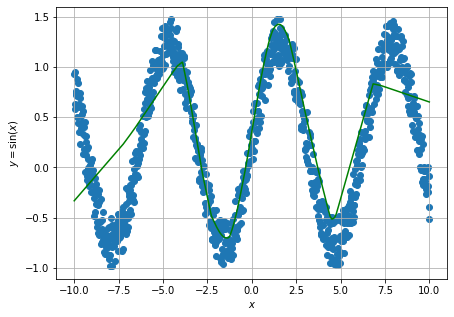

Epoch: [1/1801], loss: 0.15391719341278076


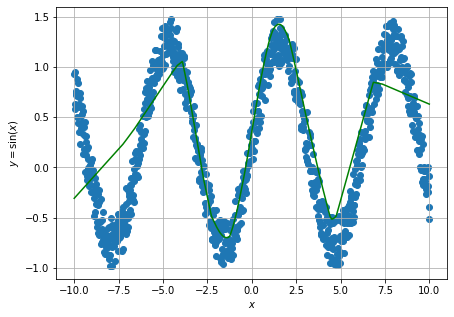

Epoch: [1/1901], loss: 0.15141995251178741


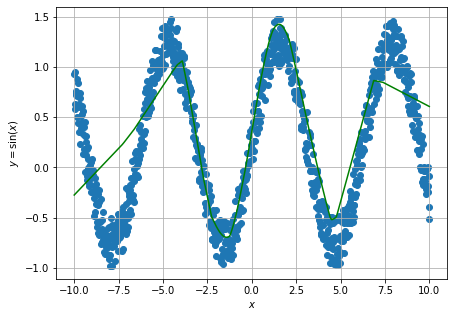

Epoch: [1/2001], loss: 0.1491311639547348


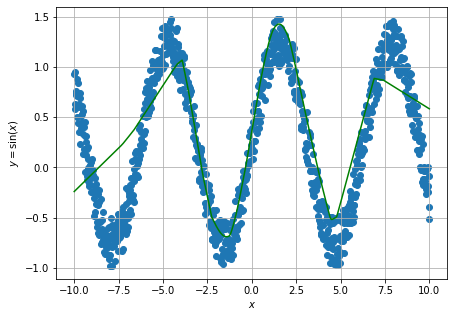

In [7]:
#-- Definimos el número de épocas
n_epoch = 2000
loss_list1 = []

# Entrenamos la red 
for epoch in range(n_epoch+1):
  
    Y_pred = model1(X)   # Hace una predicción basada en X

    loss = criterion(Y_pred, Y)
    loss_list1.append(loss.item())

    optimizer.zero_grad()   # Limpia los gradientes para una nueva predicción
    loss.backward()         # Backpropagation
    optimizer.step()        # Aplica los gradientes
    
    if (epoch%100 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('$x$')
      plt.ylabel('$y = \sin(x)$')
      plt.show()

El primer modelo y el segundo modelo usan el mismo número de epocas ($n_{epoch} = 2000$) de forma tal que podamos observar los progresos de los modelos en por lo menos $20$ gráficas. Análogamente, el coeficiente de razón de aprendizaje $l_r$ se toma como $1 \times 10^{-2}$ que nos permite buscar minimizar la pérdida tras cada época.
 

---



---


El primer modelo usa $3$ capas para solucionar un problema no lineal, cada uno relacionada a $1024$ unidades neuronales. Al usar una menor cantidad de capas que nuestro segundo modelo, se observa una mayor dificultad en la arquitectura neuronal para suavizar la forma de las rectas, incluso tras varias iteraciones de aprendizaje. En la medida que los datos se muestren "menos lineales", las capas de procesamiento del Perceptrón Multicapa se le va dificultando comprender los mínimos y máximos locales de los datos, como se observa en las gráficas anteriores para los datos alejados del centro $x = 0.0$.


---



---


La pérdida final resulta ser mayor a $0.10$, por lo que el proceso no es óptimo relacionado al bajo número de capas ocultas. A pesar de un gran uso de neuronas, vemos que, aparte de que resulta menester aumentar el número de épocas, el número de capas de ser mayor en la medida en que aumente el número de máximos y mínimos locales de los datos.





In [8]:
#--- Definimos la ANN del segundo modelo.
input_dim = 1
model2 = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 512),
                torch.nn.ReLU(),
                torch.nn.Linear(512, 512),
                torch.nn.ReLU(),
                torch.nn.Linear(512, 512),
                torch.nn.ReLU(),
                torch.nn.Linear(512, 512),
                torch.nn.ReLU(),
                torch.nn.Linear(512, 512),
                torch.nn.ReLU(),
                torch.nn.Linear(512, input_dim),
                )
model2

Sequential(
  (0): Linear(in_features=1, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=512, bias=True)
  (7): ReLU()
  (8): Linear(in_features=512, out_features=512, bias=True)
  (9): ReLU()
  (10): Linear(in_features=512, out_features=1, bias=True)
)

In [9]:
#-- Definimos el opmimizador y el score de evaluación del segundo modelo.
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-1)
criterion = torch.nn.MSELoss()  # Para una regresión es mejor usar MSE

Epoch: [1/1], loss: 0.5407805442810059


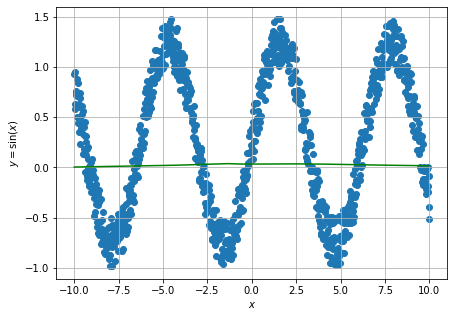

Epoch: [1/101], loss: 0.38138502836227417


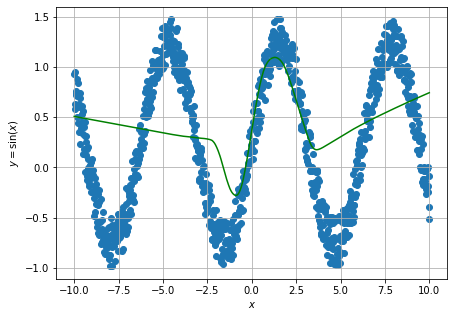

Epoch: [1/201], loss: 0.316630095243454


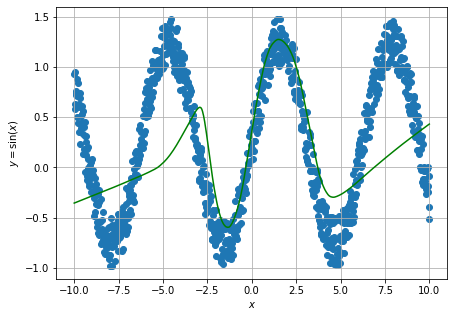

Epoch: [1/301], loss: 0.2516562342643738


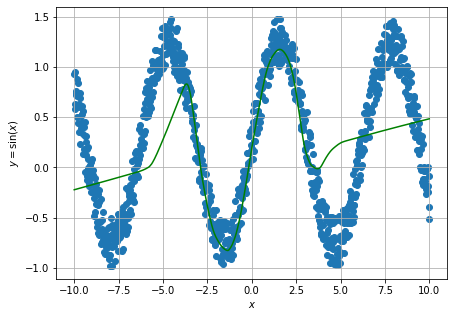

Epoch: [1/401], loss: 0.20269235968589783


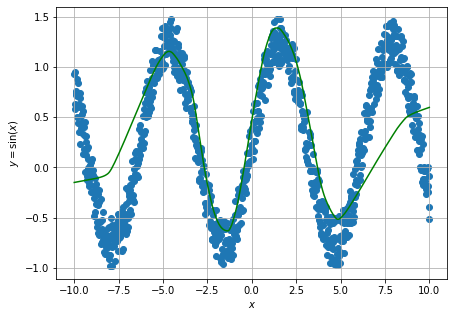

Epoch: [1/501], loss: 0.17929795384407043


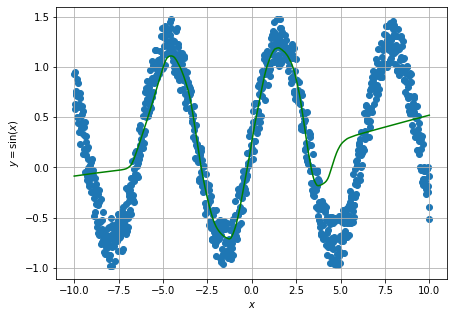

Epoch: [1/601], loss: 0.10544450581073761


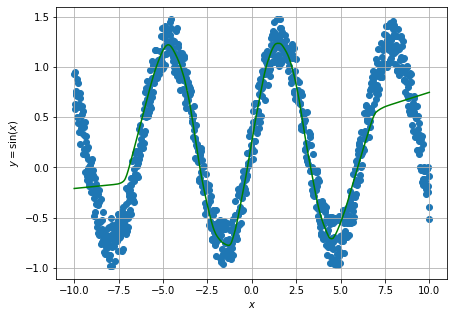

Epoch: [1/701], loss: 0.12452498078346252


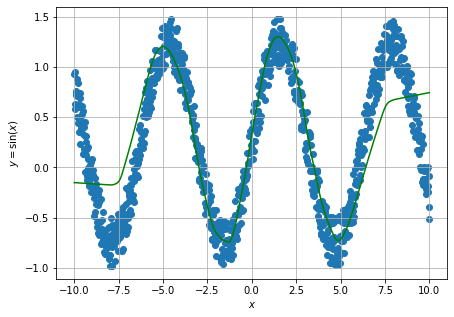

Epoch: [1/801], loss: 0.13932311534881592


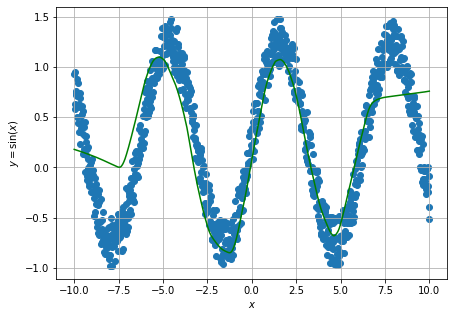

Epoch: [1/901], loss: 0.16444487869739532


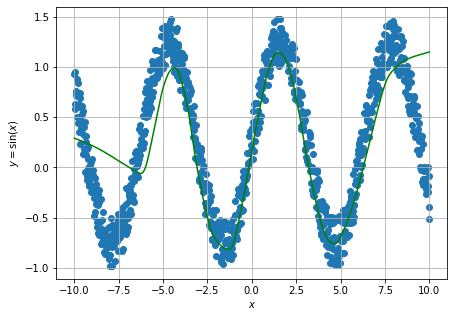

Epoch: [1/1001], loss: 0.17001381516456604


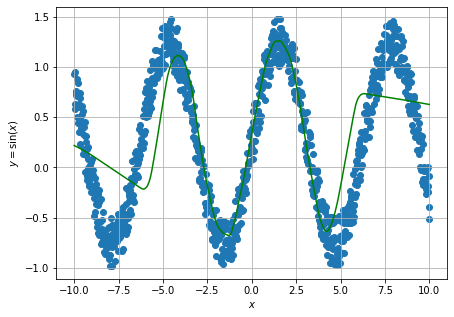

Epoch: [1/1101], loss: 0.14172500371932983


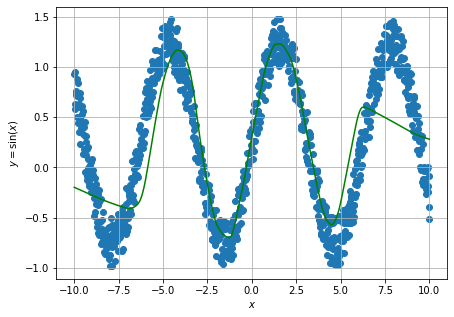

Epoch: [1/1201], loss: 0.12542355060577393


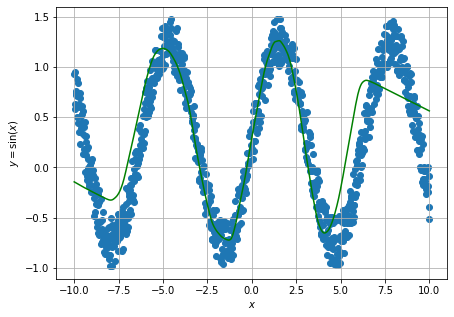

Epoch: [1/1301], loss: 0.11057836562395096


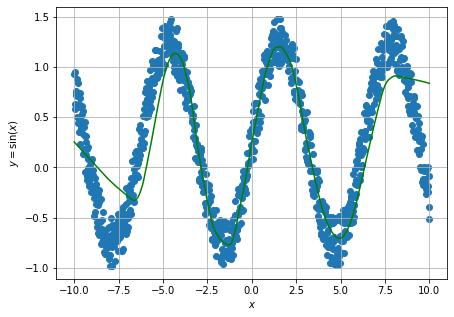

Epoch: [1/1401], loss: 0.11116757243871689


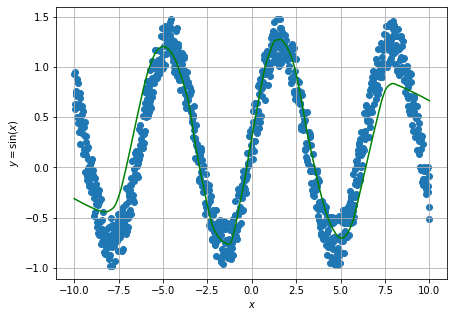

Epoch: [1/1501], loss: 0.11790791153907776


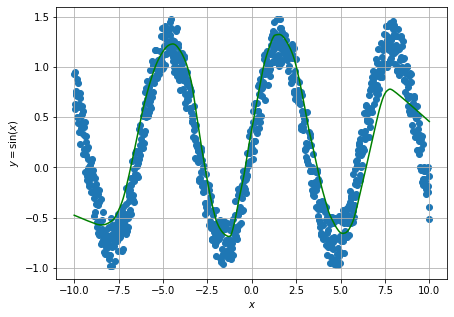

Epoch: [1/1601], loss: 0.10371067374944687


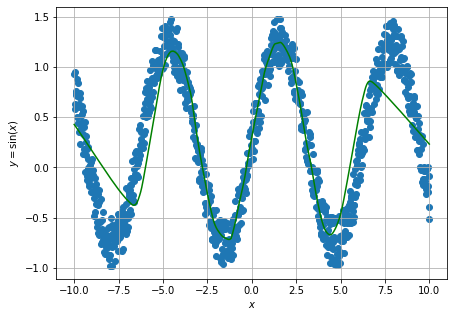

Epoch: [1/1701], loss: 0.08440659940242767


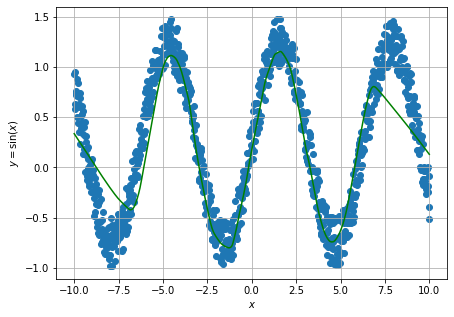

Epoch: [1/1801], loss: 0.12378707528114319


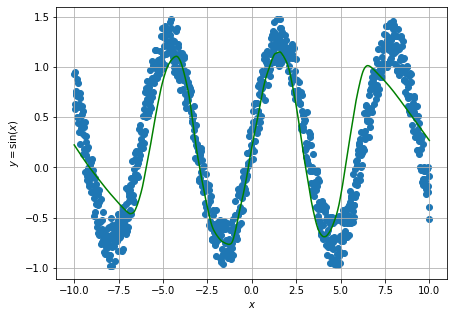

Epoch: [1/1901], loss: 0.0862702950835228


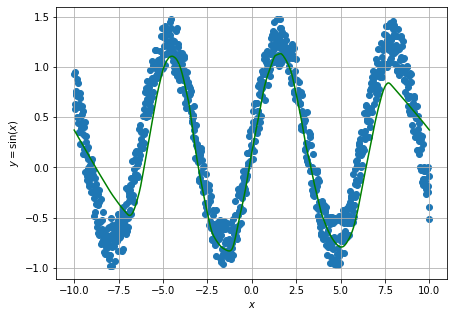

Epoch: [1/2001], loss: 0.09044086933135986


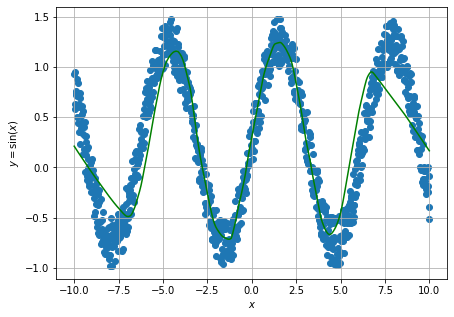

In [10]:
#-- Definimos el número de épocas
n_epoch = 2000
loss_list2 = []

# Entrenamos la red 
for epoch in range(n_epoch+1):
  
    Y_pred = model2(X)   # Hace una predicción basada en X

    loss = criterion(Y_pred, Y)
    loss_list2.append(loss.item())

    optimizer.zero_grad()   # Limpia los gradientes para una nueva predicción
    loss.backward()         # Backpropagation
    optimizer.step()        # Aplica los gradientes
    
    if (epoch%100 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('$x$')
      plt.ylabel('$y = \sin(x)$')
      plt.show()

El segundo modelo usa $6$ capas ocultas, el doble de nuestro primer modelo, y solamente $512$ neuronas relacionadas a cada una de estas capas, la mitad del primer modelo. Aunque para este modelo se observa que todavía se le dificultad la identificación de los máximos y mínimos locales alejados del centro $x=0.0$, la forma que intuye el modelo en épocas tempranas resulta ser mucho más acorde a la posición de los datos, lo cual nos indica que el MLP logra modificar el problema lineal inicial y aprende a identificar las formas de datos no lineales semejantes a curvas suaves semejantes a una función trigonométrica en buena medida. Así, vemos que debido a que el segundo modelo tiene un mayor número de capas para resolver el problema no lineal, el segundo modelo presenta mejores resultados que el primero.


---



---


La perdida evoluciona de manera progresiva hacia un mínimo que oscila alrededor del $0.1$, como se observa en la gráfica posterior, lo cual resulta mucho más óptimo que el anterior modelo, a pesar que el tiempo de ejecución de este modelo resulte un poco mayor, como se esperaba. Esto nos permite comprender que los parámetros del número de capas ocultas y el número de épocas debe ser maximizado, dentro del contexto del problema, para obtener modelos que presenten la mínima pérdida posible.

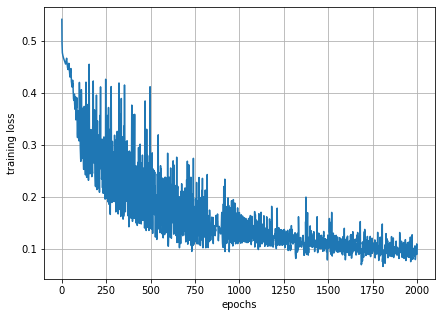

In [11]:
#-- Graficamos la perdida del segundo modelo en función de las épocas.
fig = plt.figure(figsize=(7, 5))
plt.plot(loss_list2)
plt.ylabel("training loss")
plt.xlabel("epochs")
plt.grid()
plt.show()